In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
y_pred = knn.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность классификации: {accuracy}')

Точность классификации: 1.0


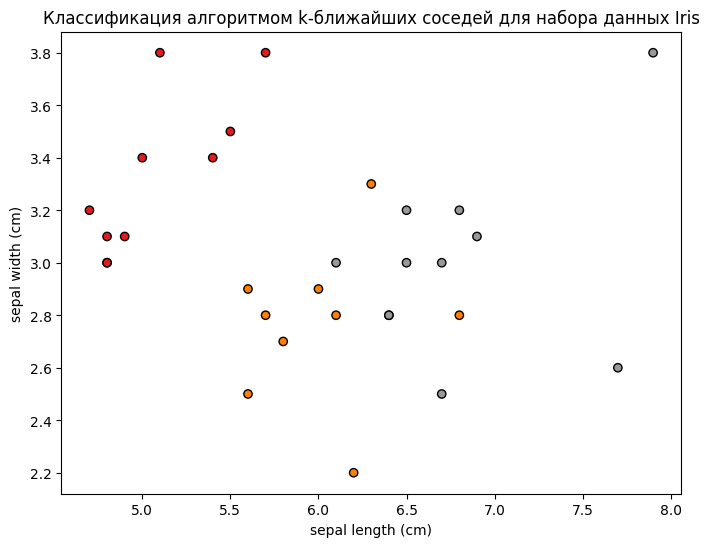

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Классификация алгоритмом k-ближайших соседей для набора данных Iris")
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = rf.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность классификации: {accuracy}')

Точность классификации: 1.0


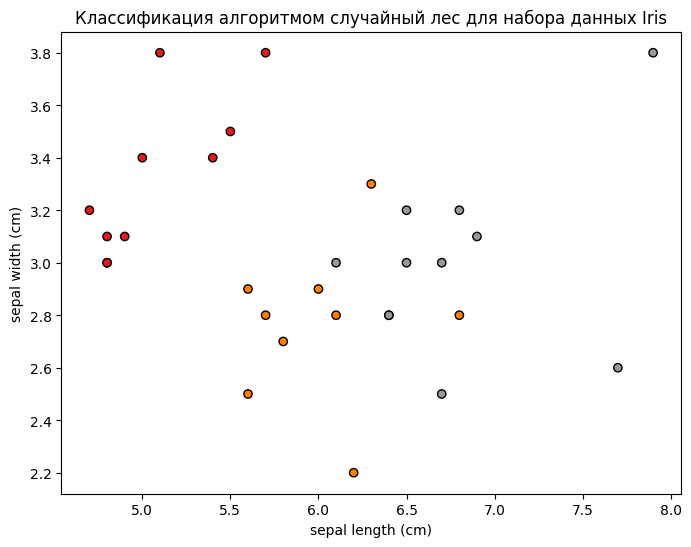

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Классификация алгоритмом случайный лес для набора данных Iris")
plt.show()

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [14]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred_svm = svm.predict(X_test)

In [16]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Точность SVM: {accuracy_svm}")

Точность SVM: 1.0


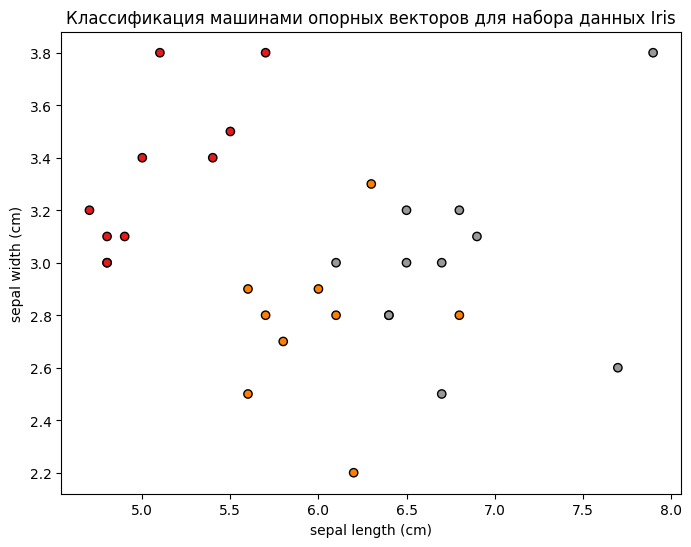

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Классификация машинами опорных векторов для набора данных Iris")
plt.show()

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_test)

C:\Users\utkad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [19]:
labels = kmeans.labels_

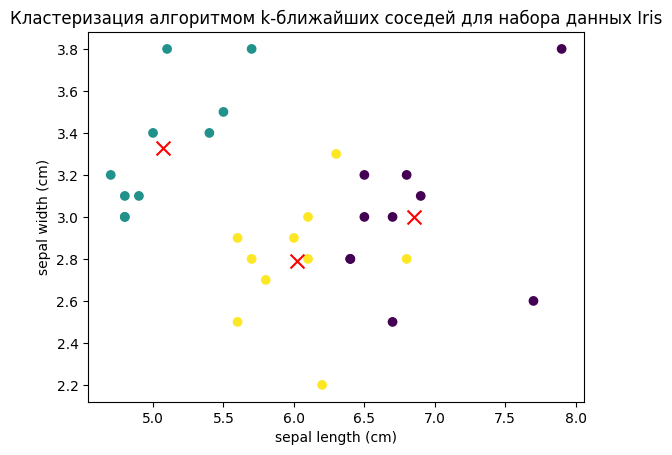

In [20]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Кластеризация алгоритмом k-ближайших соседей для набора данных Iris")
plt.show()

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
Z = linkage(X_test, 'ward')

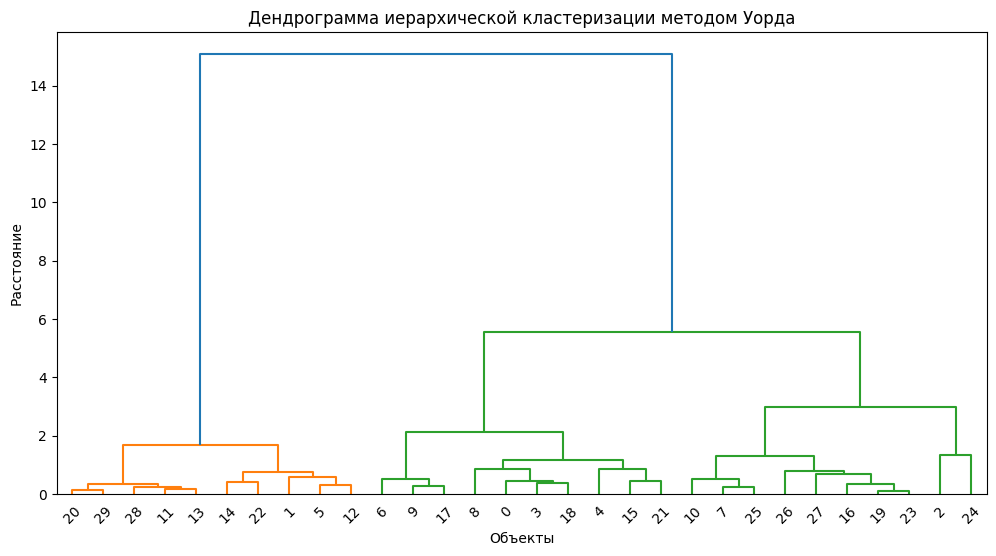

In [23]:
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Дендрограмма иерархической кластеризации методом Уорда')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

In [24]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X_test)

C:\Users\utkad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


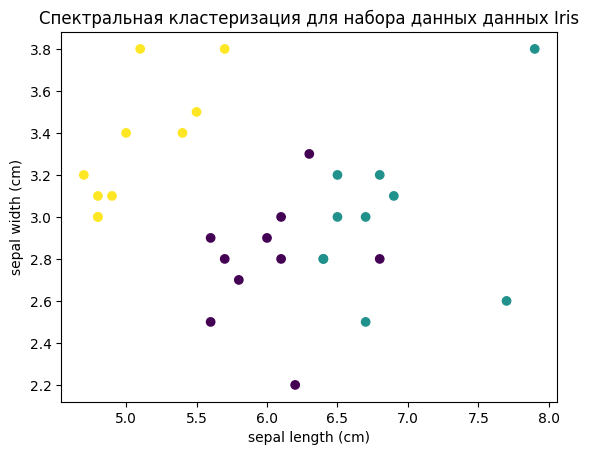

In [25]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Спектральная кластеризация для набора данных данных Iris")
plt.show()

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from ucimlrepo import fetch_ucirepo
htru2 = fetch_ucirepo(id=372) 
X = htru2.data.features 
y = htru2.data.targets

In [27]:
data = pd.concat([pd.DataFrame(X, columns=htru2.variables), pd.DataFrame(y, columns=['target'])], axis=1)

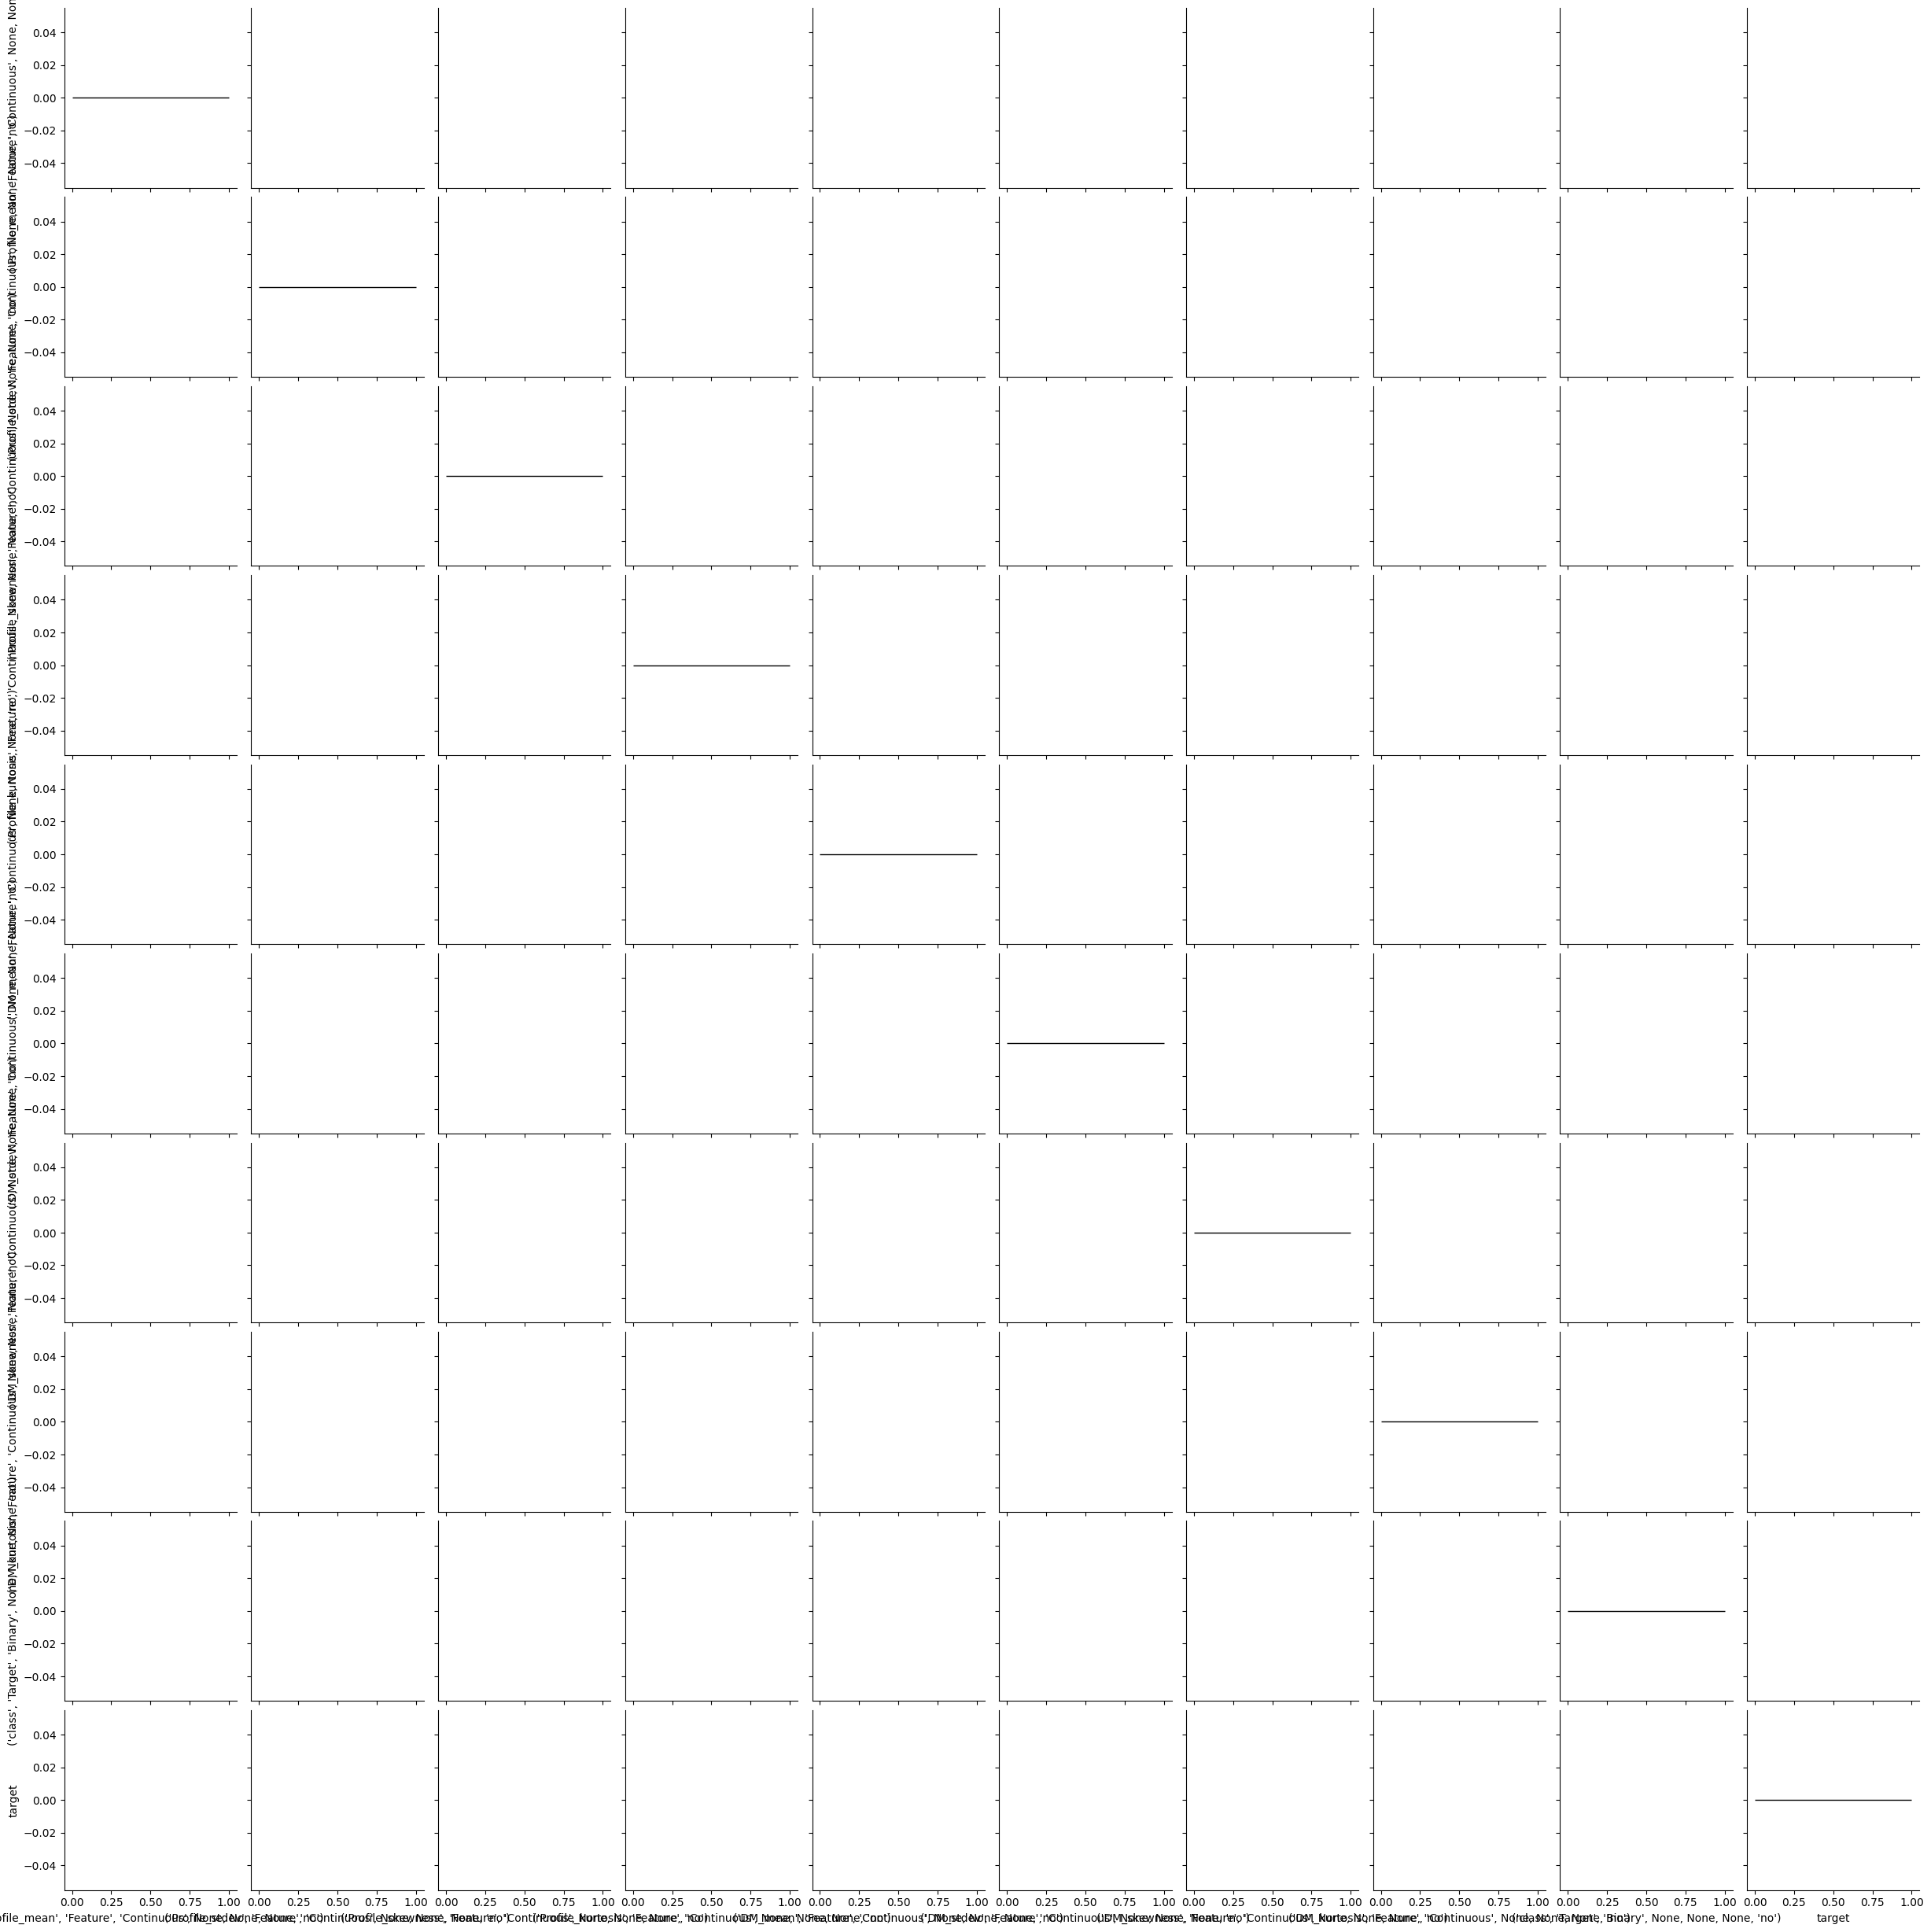

In [28]:
sns.pairplot(data)

In [29]:
#в данном наборе данных возможна линейная взаимосвязь между переменными
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

C:\Users\utkad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print('Точность модели: {:.2f}%'.format(accuracy * 100))

Точность модели: 97.77%


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.90      0.84      0.87       321

    accuracy                           0.98      3580
   macro avg       0.94      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [34]:
#точности в 98% может быть достаточно

In [35]:
import pandas as pd
data = pd.read_csv('bbchealth.txt', delimiter='|')
data.head(10)

,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/1CimpJF
0,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...
1,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...
2,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...
3,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...
4,585733482413891584,Wed Apr 08 09:18:39 +0000 2015,Review of case against NHS manager http://bbc....
5,585733481608646657,Wed Apr 08 09:18:39 +0000 2015,"VIDEO: 'All day is empty, what am I going to d..."
6,585701601131765761,Wed Apr 08 07:11:58 +0000 2015,VIDEO: 'Overhaul needed' for end-of-life care ...
7,585620828110397440,Wed Apr 08 01:51:00 +0000 2015,Care for dying 'needs overhaul' http://bbc.in/...
8,585437294120677376,Tue Apr 07 13:41:42 +0000 2015,VIDEO: NHS: Labour and Tory key policies http:...
9,585437293399252992,Tue Apr 07 13:41:42 +0000 2015,Have GP services got worse? http://bbc.in/1Ci5c22


In [36]:
data.rename(columns = {"Thu Apr 09 01:31:50 +0000 2015":"Date"}, inplace = True)
data.head(10)

,585978391360221184,Date,Breast cancer risk test devised http://bbc.in/1CimpJF
0,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...
1,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...
2,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...
3,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...
4,585733482413891584,Wed Apr 08 09:18:39 +0000 2015,Review of case against NHS manager http://bbc....
5,585733481608646657,Wed Apr 08 09:18:39 +0000 2015,"VIDEO: 'All day is empty, what am I going to d..."
6,585701601131765761,Wed Apr 08 07:11:58 +0000 2015,VIDEO: 'Overhaul needed' for end-of-life care ...
7,585620828110397440,Wed Apr 08 01:51:00 +0000 2015,Care for dying 'needs overhaul' http://bbc.in/...
8,585437294120677376,Tue Apr 07 13:41:42 +0000 2015,VIDEO: NHS: Labour and Tory key policies http:...
9,585437293399252992,Tue Apr 07 13:41:42 +0000 2015,Have GP services got worse? http://bbc.in/1Ci5c22


In [37]:
print(data.isnull().sum())

585978391360221184                                       0
Date                                                     0
Breast cancer risk test devised http://bbc.in/1CimpJF    0
dtype: int64


In [38]:
print(X.shape)

(17898, 8)


In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
X = data.iloc[:, 0:23].values
label_encoders = []
for i in range(X.shape[1]):
    if isinstance(X[0, i], str):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
        label_encoders.append((i, le))

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\utkad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\utkad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\utkad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\utkad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

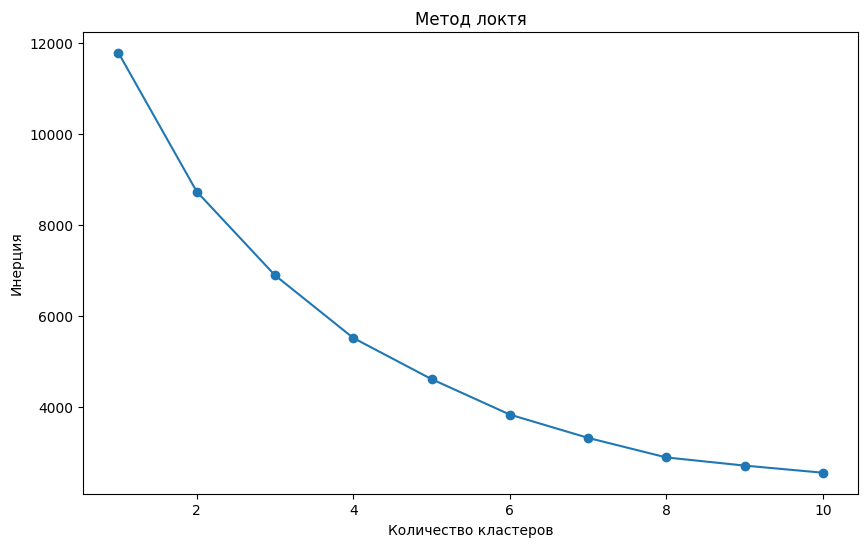

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя')
plt.show()

In [43]:
k = 4

In [44]:
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\utkad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


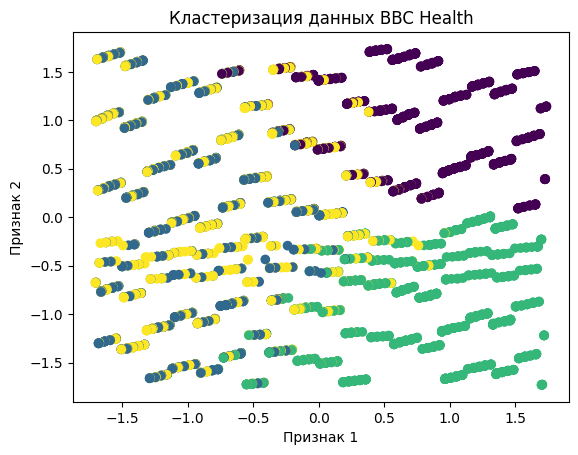

In [45]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Кластеризация данных BBC Health')
plt.show()